#### Introduction

As usage and developement of self driving car is increasing, in result research under this category should show significant growth in last decade (2014-2024)
List of Research Category which will fall under self driving cars
- cs.AI (Artificial Intelligence)
- cs.CV (Computer Vision)
- cs.RO (Robotics)
- cs.LG (Machine Learning)
- cs.SY (Systems and Control)
- cs.HC (Human-Computer Interaction)
- eess.SY (Systems and Control)
- eess.SP (Signal Processing)
- cs.NI (Networking and Internet Architecture)

#### Hypothesis 1
Research growth in listed category for the last decade vs previous year

#### Hypothesis 2
Research Growth between interconnected category in last decade

### Phase2  
##### Find Trending topic in each category
- Used LSI Latent Semantic Indexing algorithm to find topics in subdomain
- I choosed this algorithm because it can capture `Semantic Interpretation of Topics`

#### Find Top 10 Trending Topics inside that top 10 interdisciplinary area in self driving car
- Used TFIDF method with 2 gram to find some meaningful words
- used this method beacause it can find recurring word inside different documents efficiently





In [1]:
self_drive_cat = {
    "cs.AI": "Artificial Intelligence",
    "cs.CV": "Computer Vision",
    "cs.RO": "Robotics",
    "cs.LG": "Machine Learning",
    "cs.SY": "Computer Systems and Control",
    "cs.HC": "Human-Computer Interaction",
    "eess.SY": "Electronics Systems and Control",
    "eess.SP": "Signal Processing",
    "cs.NI": "Networking and Internet Architecture"
}
self_drive_cat_list = list(self_drive_cat.keys())

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from gensim.models import LsiModel
from gensim import corpora
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

stemmer = PorterStemmer()
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
# chunk_list = []
# for chunk in pd.read_json('dataset/arxiv-metadata-oai-snapshot.json', lines=True, chunksize=chunk_size):
#     chunk.drop(columns=
#                ["id" , "submitter" , "comments" , "journal-ref" ,
#                 "doi" , "report-no" , "license" , "versions", "authors_parsed"] , inplace=True)
#     chunk_list.append(chunk)

# pd.concat(chunk_list).to_csv("cleaned_data.csv")

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
arxiv_df = df

In [7]:
# pandas apply function to filtered only required category in our case self driving car
def get_filtered_categories(all_category ):
    for listed_categoty in all_category.split(" "):
        if listed_categoty in self_drive_cat_list:
            return True
    return False

filtered_cat_df = arxiv_df[arxiv_df["categories"].apply(get_filtered_categories)]
filtered_cat_df.head()

,Unnamed: 0,authors,title,categories,abstract,update_date
46,46,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,cs.NE cs.AI,The intelligent acoustic emission locator is...,2009-09-29
49,49,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,cs.NE cs.AI,Part I describes an intelligent acoustic emi...,2007-05-23
303,303,Carlos Gershenson,The World as Evolving Information,cs.IT cs.AI math.IT q-bio.PE,This paper discusses the benefits of describ...,2013-04-05
527,527,"Chi Pan Chan, Soung Chang Liew, An Chan",Many-to-One Throughput Capacity of IEEE 802.11...,cs.NI cs.IT math.IT,This paper investigates the many-to-one thro...,2007-07-13
670,670,Maxim Raginsky,Learning from compressed observations,cs.IT cs.LG math.IT,The problem of statistical learning is to co...,2016-11-15


In [9]:
#to return unique categories from a df
def get_all_unique_cat(filtered_cat_df):
    unique_cat = set()
    for cat in filtered_cat_df["categories"].to_list():
        unique_cat.update(cat.split(" "))

    return unique_cat

## Pandas apply function : to find category present in list
def is_present(cat_list , curr_cat):
    if curr_cat in cat_list.split(" "):
        return True
    return False

# Add status of each category as individual column
def add_category_status(unique_cat , all_df):
    for col in self_drive_cat_list:
        all_df[f"cat_{col}"] = all_df["categories"].apply(is_present,args=(col , ))
    return all_df


In [10]:
# add column of each category
def filtered_category_to_column(all_data):
    filtered_cat_df = all_data[all_data["categories"].apply(get_filtered_categories)]
    unique_cat = get_all_unique_cat(filtered_cat_df)
    all_data = add_category_status(unique_cat , all_data)
    all_data["year"] = pd.to_datetime(all_data["update_date"]).dt.year
    return all_data

arxiv_df = filtered_category_to_column(arxiv_df)

In [11]:

def get_slope(year_count_df , col):
    slope, _ = np.polyfit(year_count_df.index, year_count_df[col].to_list() , 1)
    return round(slope.item() , 4)

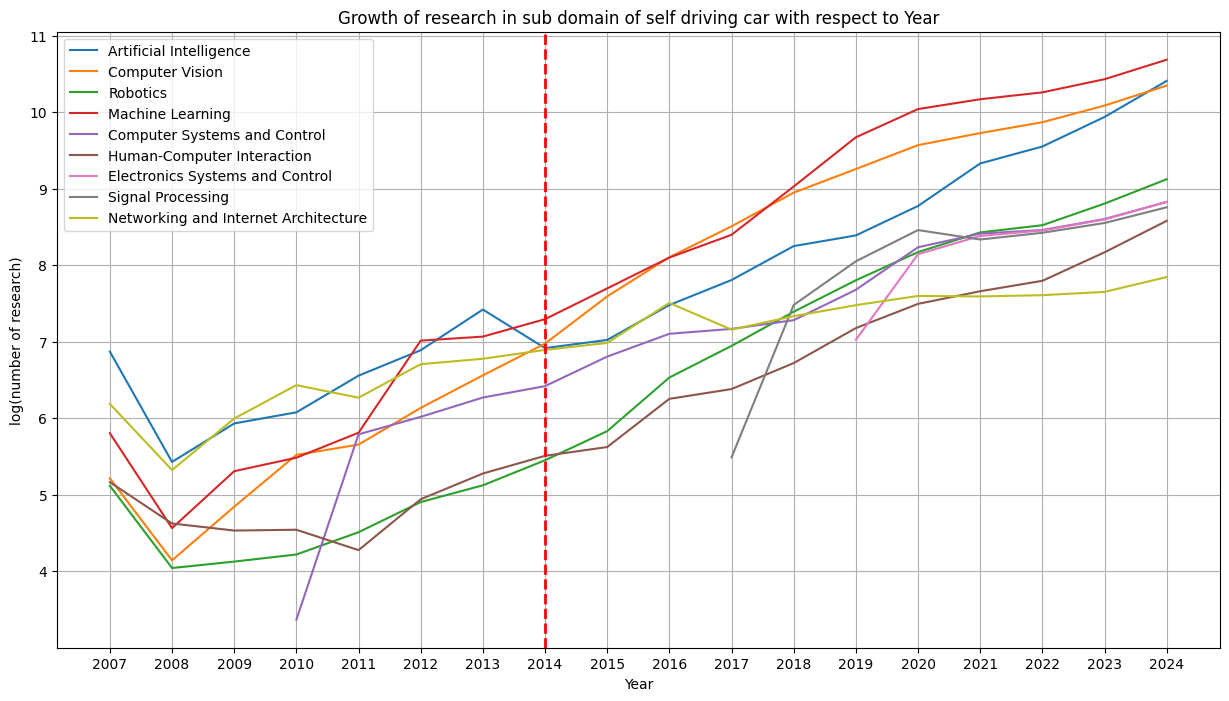

In [12]:
growth_list = []
plt.figure(figsize=(15,8))
for sd_cat in self_drive_cat_list:
    col_name = f"cat_{sd_cat}"
    cat_count_df = arxiv_df[arxiv_df[col_name]][[col_name, "year"]].groupby("year").count()
    plt.plot(cat_count_df.index , np.log(cat_count_df[col_name].to_list()) , label = self_drive_cat[sd_cat] )
    prev_slope , last_slope = 0 , 0
    #print(cat_count_df)
    if len(cat_count_df)  > 0:
        before_df = cat_count_df[cat_count_df.index < 2014]
        after_df = cat_count_df[cat_count_df.index >= 2014]
        before_2014 = 0 if len(before_df) == 0 else get_slope(before_df , col_name)
        after_2014 = 0 if len(after_df) == 0 else get_slope(after_df , col_name)
    growth_list.append(( self_drive_cat[sd_cat] , round(before_2014,2) , round(after_2014,2)))

plt.axvline(x=2014, color='r', linestyle='--', linewidth=2)
custom_ticks = [ year for year in range(2007 , 2025)]       # Positions for the ticks
custom_labels = [ str(year) for year in range(2007 , 2025)]
plt.xticks(ticks=custom_ticks, labels=custom_labels)
plt.xlabel("Year")
plt.ylabel("log(number of research)")
plt.title("Growth of research in sub domain of self driving car with respect to Year")
plt.grid()
plt.legend()
plt.show()


#### Chart Description
- Each line show progress of each sub domain of self driving car over the years

#### Summary
- All subdomain of self driving car is rising
- Research under AI, Computer Vision and Machine Learning was growing even before last 10 years
- Domain like Robotics catchup with other domains like AI and Computer Vision after a while
- Growth of `Computer System and Controls` and `Human-Computer Interaction` shows the emerging field  of of hardware , software and Human interaction with machines

##### Note
This graph is drawn between log(number of research) vs year. To normalise the growth of each domain we took log

In [13]:
growth_df = pd.DataFrame(growth_list , columns=["category" , "before14" , "after14"])
growth_df.replace(0,1 , inplace=True)
growth_df["growth_factor"] = round(growth_df["after14"]/growth_df["before14"] , 2)
growth_df[["category" , "growth_factor"]].sort_values("growth_factor" ,ascending=False)[:5]

,category,growth_factor
6,Electronics Systems and Control,992.03
7,Signal Processing,756.30
2,Robotics,124.69
5,Human-Computer Interaction,104.04
1,Computer Vision,31.95


### This table show a quantative way to represent the growth of category before and after 2014
- Growth_factor = `slope of plot after 2014` `/` `slope of plot after 2014`
- Growth factor can be represented as how many times the research increased

In [33]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords]
    return tokens

In [53]:
def get_topics(cat):
  titles = df[df[cat]==True]["title"].to_list()
  processed_corpus = [preprocess_text(doc) for doc in titles]
  dictionary = corpora.Dictionary(processed_corpus)
  bow_corpus = [dictionary.doc2bow(doc) for doc in processed_corpus]
  lsi = LsiModel(bow_corpus, num_topics=5, id2word = dictionary)
  return lsi

In [63]:
for cat in self_drive_cat_list:
  print(self_drive_cat[cat])
  col = f"cat_{cat}"
  model_object = get_topics(col)
  x=model_object.show_topics(num_topics=2, num_words=5,formatted=False)
  for topic , words in x:
    print("Topic" , topic," -- ", [word[0] for word in words])
  print("*"*100)


Artificial Intelligence
Topic 0  --  ['learning', 'reinforcement', 'deep', 'models', 'using']
Topic 1  --  ['models', 'language', 'large', 'learning', 'model']
****************************************************************************************************
Computer Vision
Topic 0  --  ['learning', 'deep', 'image', 'using', 'detection']
Topic 1  --  ['image', 'learning', 'segmentation', 'network', 'neural']
****************************************************************************************************
Robotics
Topic 0  --  ['learning', 'reinforcement', 'using', 'control', 'robot']
Topic 1  --  ['learning', 'control', 'using', 'planning', 'robot']
****************************************************************************************************
Machine Learning
Topic 0  --  ['learning', 'deep', 'reinforcement', 'neural', 'using']
Topic 1  --  ['neural', 'networks', 'learning', 'network', 'graph']
*********************************************************************************

## Trending Topic in each category

### Steps to find trending topic in each catefory
1. Filter data with your required category for all the subdomains of self driving car
2. Segregate each topic from the space seprated common column into different columns
3. filter data of each category
4. do data cleaning remove stopwords and change to tokens
5. fit into LSI Model (Latent Semantic Indexing)
6. Print 2 topic from each domain

### Summary
Most of the words came out from this method are repetitive even in different domain we changed number of topic for tunning as used abstacts as input data but titles with 2 topics gave less number of recurring words in a topic

In [55]:

pairs = list(itertools.combinations(self_drive_cat_list,3 ))

edges = []
for n1 , n2 , n3 in pairs:
    col1 = f"cat_{n1}"
    col2 = f"cat_{n2}"
    col3 = f"cat_{n3}"
    collab_after_2014 = sum(df[(df[col1]) & (df[col2]) & (df[col3])  & (df["year"] >= 2014)][[col1  , "year" ]].groupby("year").count()[col1].to_list())
    edges.append([n1, n2 , n3 , round(collab_after_2014,5)])

sorted_edges = sorted( edges , key=lambda x : x[3] ,reverse= True )[:10]
pd.DataFrame(sorted_edges , columns = ["Node1" , "Node2" ,"Node3" , "edge_weight"])

,Node1,Node2,Node3,edge_weight
0,cs.AI,cs.CV,cs.LG,8506
1,cs.LG,cs.SY,eess.SY,4135
2,cs.RO,cs.SY,eess.SY,3828
3,cs.AI,cs.RO,cs.LG,3166
4,cs.CV,cs.RO,cs.LG,2137
5,cs.AI,cs.SY,eess.SY,1802
6,cs.AI,cs.CV,cs.RO,1661
7,cs.SY,eess.SY,eess.SP,1545
8,cs.AI,cs.LG,cs.HC,1212
9,cs.AI,cs.LG,cs.SY,1084


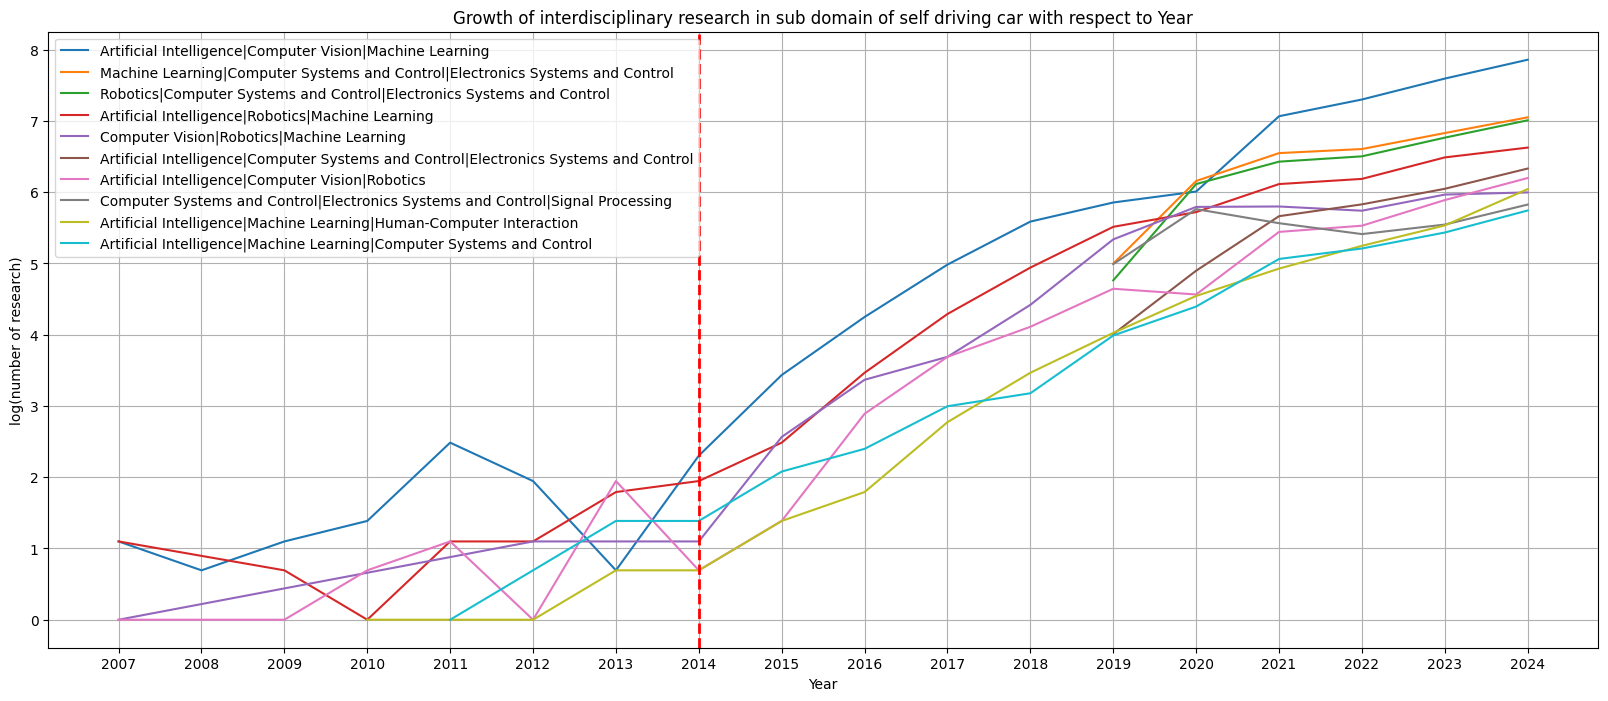

In [56]:
plt.figure(figsize=(20,8))
edges = []
for n1 , n2 , n3 , weight in sorted_edges:
    col1 = f"cat_{n1}"
    col2 = f"cat_{n2}"
    col3 = f"cat_{n3}"
    edge_df = df[ (df[col1]) & (df[col2]) & (df[col3]) ][[col1  , "year" ]].groupby("year").count()
    #edges.append( (f"{n1}-{n2}" , edge_df[col1].sum().item() ) )
    plt.plot(edge_df.index ,
             np.log(edge_df[col1].to_list()),
             label = f"{self_drive_cat[n1]}|{self_drive_cat[n2]}|{self_drive_cat[n3]}" )

plt.axvline(x=2014, color='r', linestyle='--', linewidth=2)
custom_ticks = [ year for year in range(2007 , 2025)]       # Positions for the ticks
custom_labels = [ str(year) for year in range(2007 , 2025)]
plt.xticks(ticks=custom_ticks, labels=custom_labels)
plt.xlabel("Year")
plt.ylabel("log(number of research)")
plt.title("Growth of interdisciplinary research in sub domain of self driving car with respect to Year")
plt.grid()
plt.legend()
plt.show()

### Chart Description
This chart shows the multidisciplinary study under self driving car
x-axis :  Year
y-axis : Log(number of research common among all 3 fields)

### Summary of Chart
- interelated study of `AI, ML and Human Computer Interaction` and `AI, ML and Control system` study show  shows a significant rise which is major indicator of usage and development of self driving car
- Another intersection of `AI, Computer Vision and Robotics` show there is significant growth in this area

In [57]:
def preprocessing_text_col(df ):
    df = df.str.lower()
    df = df.apply(lambda x: re.sub(r'[^\w\s]', '', x))
    df = df.apply(nltk.word_tokenize)
    df = df.apply(lambda x: [word for word in x if word not in stopwords])
    df = df.apply(lambda x: [lemmatizer.lemmatize(word ) for word in x])
    #df = df.apply(lambda x: [stemmer.stem(word) for word in x])
    df = df.apply(lambda x : " ".join(x))
    return df

#title_clean = preprocessing_text_col()
#title_clean.to_list()[:10]

In [58]:
tfidf = TfidfVectorizer(ngram_range=(2,2))

In [59]:
# to find tfidf score of interelated study during a period
def get_tfidf_scores(df ,  n1 , n2 ,n3 , start_year , end_year):
    col1 = f"cat_{n1}"
    col2 = f"cat_{n2}"
    col3 = f"cat_{n3}"
    filtered_titles = df[
        (df[col1] == True)  &
        (df[col2] == True) &
        (df[col3] == True) &
        (df["year"] <= end_year) &
        (df["year"] >= start_year)
        ]["title"]
    #print(filtered_titles)
    title_clean = preprocessing_text_col(filtered_titles).to_list()
    #print(title_clean)
    if len(title_clean) == 0:
        title_clean = ["THis is dummuy value" , " this is not dummy" ]
    result = tfidf.fit_transform(title_clean)
    tfidf_df = pd.DataFrame(result.toarray(), columns=tfidf.get_feature_names_out())
    tfidf_scores = tfidf_df.sum().sort_values(ascending=False)
    return tfidf_scores

#get_tfidf_scores(df , "cs.AI" , "cs.CV" , "cs.RO" , 2014 , 2019)

In [60]:
# find slope of topic to find its growth
def get_topic_slope(df , n1 , n2 , n3):
    first_df = get_tfidf_scores(df , n1 , n2 ,n3 , 2014 , 2019)

    second_df = get_tfidf_scores(df ,  n1 , n2 ,n3  , 2020 , 2024)
    #year21_24_df = get_tfidf_scores(df ,  n1 , n2 ,n3  , 2021 , 2024)
    s1 = set(first_df[first_df > 1].index)
    s2 = set(second_df[second_df > 1].index)
    #s3 = set(year21_24_df[year21_24_df > 1].index)
    topic_with_slope = []
    for topic in s1.intersection(s2):
        topic_with_slope.append(
            [
                topic,
                first_df[topic],
                second_df[topic],
                #year21_24_df[topic]
            ]
        )
    return pd.DataFrame(topic_with_slope , columns=["topic" , "s1" , "s2" ])

#slope_df = get_topic_slope(df,"cs.AI" , "cs.SY" , "cs.RO")

### Top 10 trending topics in Last decade of Top 10 interdisciplinary research in sub domain of self driving

In [61]:

all_topics = []

for n1 , n2 , n3 , w in sorted_edges:
    print(f" {self_drive_cat[n1]} || {self_drive_cat[n2]} || {self_drive_cat[n3]}")
    slope_df = get_topic_slope(df, n1, n2 , n3)
    slope_df["growth_factor"] = slope_df["s2"]/slope_df["s1"]
    trend_topics = slope_df.sort_values(by = "growth_factor" , ascending=False)["topic"].to_list()
    all_topics.extend(trend_topics[:10])
    print()
    print(", ".join(trend_topics[:10]))
    print()
    print("*"*100)

 Artificial Intelligence || Computer Vision || Machine Learning

image classification, architecture search, medical image, object detection, knowledge distillation, representation learning, machine learning, point cloud, computer vision, continual learning

****************************************************************************************************
 Machine Learning || Computer Systems and Control || Electronics Systems and Control

machine learning, neural network, reinforcement learning, predictive control, gaussian process, model predictive, deep reinforcement, system identification, power flow, learning approach

****************************************************************************************************
 Robotics || Computer Systems and Control || Electronics Systems and Control

motion planning, autonomous vehicle, neural network, reinforcement learning, deep reinforcement, using deep, controller synthesis

*********************************************************

### Steps to find Trending topics in the emerging interdisciplinary study

1. Extracted all the common research articles from listed category
2. Cleaned the text using stopwords and lemmatization
3. Used `TFIDF` to find recurring words
4. Find common words trending in 1st half and another half of decade
5. Compared the growth of 1st and 2nd half and sorted based on growth

### Summary
- We can see there is some emerging topics in field of `Artificial Intelligence || Computer Vision || Machine Learning` like `image classification, architecture search, medical image, object detection`

- Some Topics like `power system, sensor network, power flow, load monitoring` under Computer Systems and Control || Electronics Systems and Control || Signal Processing shows more optimization is required in term of sensor network, power system.

- Topics came out from Artificial Intelligence || Computer Vision || Robotics shows following core field is still under the research category they yet have to time reach saturation under this categories. object detection, autonomous driving, semantic segmentation, 3d object, point cloud, pose estimation, reinforcement learning, visual navigation, robot learning, deep learning

### Common List of all some Trending topics from different multidisciplinary domain

object detection, knowledge distillation, point cloud, predictive control, gaussian process, deep reinforcement,  power flow, learning approach, `motion planning`,  reinforcement learning, deep reinforcement,`robotic manipulation`, model based reinforcement, `trajectory prediction`, autonomous vehicle, safe reinforcement, `path planning`, learning via, autonomous driving, `visual navigation`, `pose estimation`, `3d object`,power system, `sensor network`, power flow, `load monitoring`,predictive control

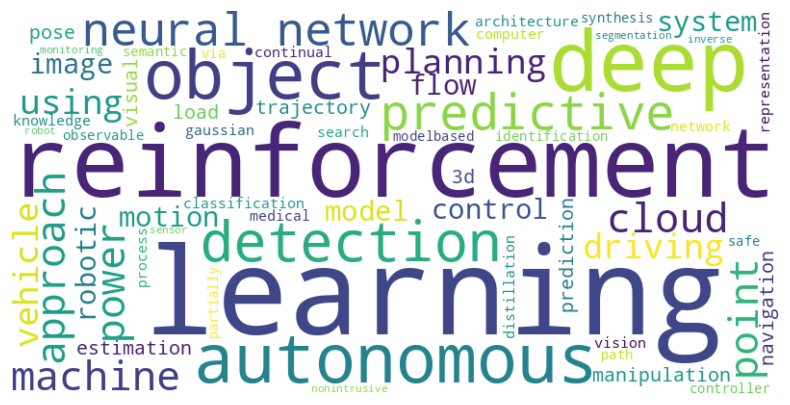

In [62]:
from wordcloud import WordCloud

text = ", ".join(all_topics)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
